In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The following code was taken from the following sources:
- One Hot encoding: from practicals and https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- Loss Acc graph: practicals
- Confusion matrix and classificatio report: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
- ROC curve: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
- Adjusting Max Pooling layers: https://keras.io/api/layers/pooling_layers/max_pooling2d/
- Early stopping: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
- Dropout rate: practicals
- Conv2D layer increase in filters: https://keras.io/api/layers/convolution_layers/convolution2d/
- Transfer learning model: https://keras.io/api/applications/resnet/#resnet50-function



First, download the dataset from the following link as .zip file:

https://academictorrents.com/details/7a638ed187a6180fd6e464b3666a6ea0499af4af

Then, extract the zip file into a folder. You can then upload this dataset to your google drive folder or use it on any platform you want.

For more information about dataset, you can see this article:
The Article: https://arxiv.org/abs/1912.12142


## Downloading and Saving Dataset

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Replace these paths with the actual paths to your dataset folders
data_dir = '/content/drive/MyDrive/Colab Notebooks/Deep learning/Assignment/LC25000/lung_colon_image_set'
filepaths = []
image_data = []
labels = []


folds = os.listdir(data_dir)

for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    flist = os.listdir(foldpath)

    for f in flist:
        f_path = os.path.join(foldpath , f)
        filelist = os.listdir(f_path)

        for file in filelist:
            fpath = os.path.join(f_path , file)
            try:
              # Open the image using PIL (or you can use OpenCV) within a 'with' statement
              with Image.open(fpath) as image:
                if image is not None:
                  # Resize images
                  im = image.resize((120,120), Image.LANCZOS)
                  # Append image and label to respective lists
                  image_data.append(np.array(im))
                else:
                  print(f"Error opening image '{fpath}': NoneType object returned")
            except Exception as e:
              print(f"Error opening image '{fpath}': {e}")
            # Assign the label of the images according to the folder they belongs to.
            if f == 'colon_aca':
                labels.append('Colon adenocarcinoma')

            elif f == 'colon_n':
                labels.append('Colon Benign Tissue')

            elif f == 'lung_aca':
                labels.append('Lung adenocarcinoma')

            elif f == 'lung_n':
                labels.append('Lung Benign Tissue')

            elif f == 'lung_scc':
                labels.append('Lung Squamous Cell Carcinoma')

tr_labels = np.array(labels)
image_matrix = np.array([np.array(img) for img in image_data])

np.save("/content/drive/MyDrive/Colab Notebooks/Deep learning/Assignment/data120.npy",image_matrix)
np.save("/content/drive/MyDrive/Colab Notebooks/Deep learning/Assignment/labels120.npy",tr_labels)


Once you have saved the data and labels into a folder, you can call them from the related folder and use them in any way you want.

#Call data from directory

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data files
file_dir = "/content/drive/MyDrive/Colab Notebooks/Deep learning/Assignment/"
data = np.load(file_dir + "data120.npy")
labels = np.load(file_dir + "labels120.npy", allow_pickle=True)

# Preprocessing and EDA (Exploratory Data Analysis)


## Converting the Target Values to the One-Hot-Encoded Format

In [3]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Use label encoder
label_encoder = LabelEncoder()

# Text labels to integers
integer_encoded_labels = label_encoder.fit_transform(labels)

# Get unique classes
num_classes = len(np.unique(integer_encoded_labels))

# One-hot encode integer labels
labels_encoded = to_categorical(integer_encoded_labels, num_classes=num_classes)

## Visualizing Sample Images

<ipython-input-4-85d1cc67e389>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


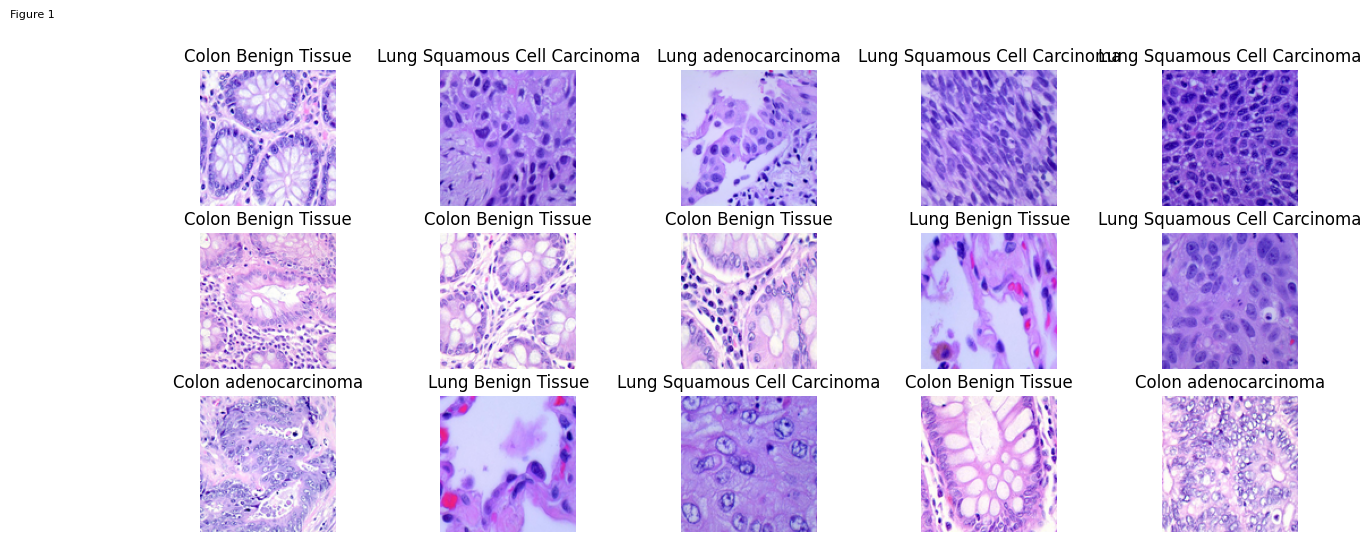

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Select 15 samples
selected_indices = np.random.choice(len(data), 15, replace=False)

# Creating plot
fig, axes = plt.subplots(3, 5, figsize=(15, 6))
axes = axes.ravel()

for i, idx in enumerate(selected_indices):
    ax = axes[i]
    ax.imshow(data[idx])
    ax.set_title(labels[idx])
    ax.axis('off')

plt.text(0.02, 0.98, 'Figure 1', transform=plt.gcf().transFigure, fontsize=8,
         verticalalignment='top', horizontalalignment='left')

plt.tight_layout()

# Save image
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Deep learning/Assignment/sample_images.jpg')

# Show image
plt.show()

## Visualizing Class Distribution

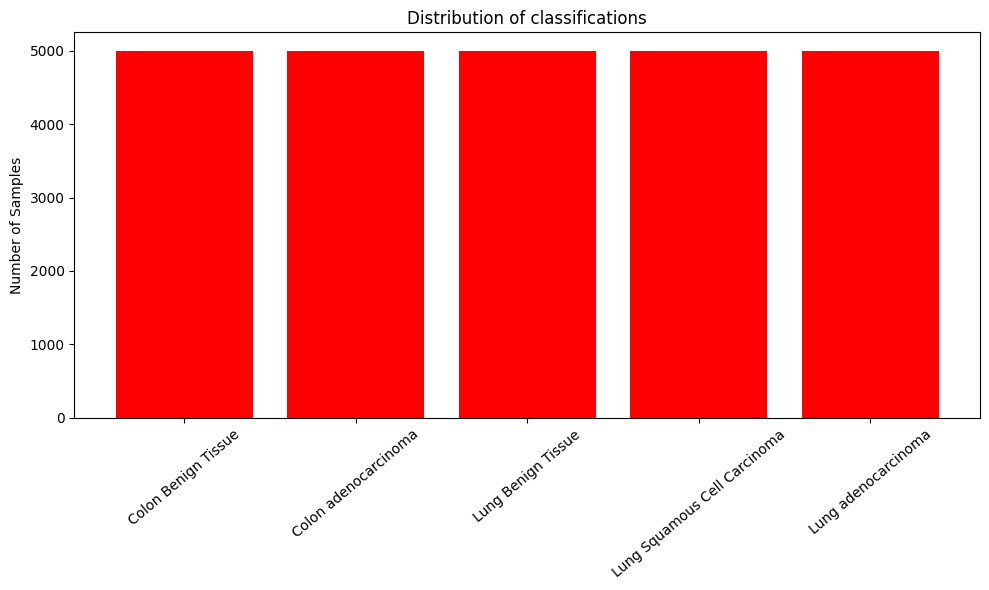

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Count unique labels
unique, counts = np.unique(labels, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='red')
plt.ylabel('Number of Samples')
plt.title('Distribution of classifications')
plt.xticks(rotation=40)
plt.tight_layout()

# Save image
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Deep learning/Assignment/distribution_per_class.jpg')

# Show graph
plt.show()

##Train-Test-Val Split

In [8]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(data, labels_encoded, test_size = 0.2, stratify=labels_encoded, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.25, stratify=y_trainval, random_state = 42)

# Checking the distribution
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(15000, 120, 120, 3) (5000, 120, 120, 3) (5000, 120, 120, 3) (15000, 5) (5000, 5) (5000, 5)


# Evaluation Functions

Since you will use the same evaluation functions several times ( to evaluate the baseline, enhanced and transfer learning models), it is better to prepare the standardized functions to calculate them each time in the same way.

In [4]:
## LOSS-ACC GRAPHS

import matplotlib.pyplot as plt

def plot_loss_accuracy(history, type_of_model):

    # Set figure size
    plt.figure(figsize=(10, 5))

    # Best epoch for validation accuracy
    best_epoch_val_acc = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
    best_val_accuracy = max(history.history['val_accuracy'])

    # Accuracy plotting
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.scatter(best_epoch_val_acc - 1, best_val_accuracy, color='red', s=50)
    plt.title(f'{type_of_model} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy', f'Best Epoch = {best_epoch_val_acc}'])

    # Best epoch for validation loss
    best_epoch_val_loss = history.history['val_loss'].index(min(history.history['val_loss'])) + 1
    best_val_loss = min(history.history['val_loss'])

    # Loss plotting
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.scatter(best_epoch_val_loss - 1, best_val_loss, color='red', s=50)
    plt.title(f'{type_of_model} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss', f'Best Epoch = {best_epoch_val_loss}'])
    plt.tight_layout()

    # Save image
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Deep Learning/Assignment/{type_of_model}_validation_and_loss.jpg')

    # Show image
    plt.show()


In [14]:
#Conf matrix and Classification Report:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
class_names = ['Colon Benign Tissue', 'Colon adenocarcinoma', 'Lung Benign Tissue', 'Lung Squamous Cell Carcinoma', 'Lung adenocarcinoma']

def evaluate_model(model, X_test, y_test, type_of_model):
    # Predicting the classes on the test set
    y_pred = model.predict(X_test)

    # Converting predictions and labels to class indices
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Generating the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Generating the classification report
    clr = classification_report(y_true, y_pred_classes, target_names=class_names)

    # Plotting the confusion matrix
    num_classes = len(class_names)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=range(num_classes), yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Save image
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Deep learning/Assignment/{type_of_model}_confusion_matrix.jpg')

    #Show plot
    plt.show()

    print('Classification Report:')
    print(clr)


In [6]:
#ROC curves
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

def plot_multiclass_roc(model, X_test, y_test, n_classes, class_names, type_of_model):
    # Predict probabilities for each class
    y_score = model.predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for each class and micro-average
    plt.figure(figsize=(10, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic of Multi-class')
    plt.legend(loc="lower right")

    # Save image
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Deep Learning/Assignment/{type_of_model}_ROC_Cuvrve.jpg')

    #Show image
    plt.show()


# Baseline Model

In [9]:
#Building the ORIGINAL baseline model
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# creating a sequential model
model_a = Sequential()

# Adding a convolutional and pooling layers
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same', input_shape = X_train.shape[1:]))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Adding Dense leayers
model_a.add(layers.Flatten())
model_a.add(layers.Dense(128, activation='relu'))
model_a.add(layers.Dense(32, activation='relu'))
model_a.add(layers.Dense(5, activation='softmax'))

# Printing out the model summary
model_a.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)              

In [10]:
#Compiling the model
model_a.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = model_a.fit(X_train,
                      y_train,
                      epochs=10,
                      batch_size=32,
                      validation_data = (X_val, y_val))
test_loss, test_acc = model_a.evaluate(X_test, y_test)

Epoch 1/10
469/469 [==============================] - 31s 53ms/step - loss: 4.4193 - accuracy: 0.4526 - val_loss: 0.7015 - val_accuracy: 0.6336
Epoch 2/10
469/469 [==============================] - 16s 35ms/step - loss: 0.7145 - accuracy: 0.6520 - val_loss: 0.6514 - val_accuracy: 0.6676
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.6406 - accuracy: 0.6911 - val_loss: 0.6416 - val_accuracy: 0.7028
Epoch 4/10
469/469 [==============================] - 17s 36ms/step - loss: 0.5937 - accuracy: 0.7163 - val_loss: 0.6678 - val_accuracy: 0.6976
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: 0.4977 - accuracy: 0.7726 - val_loss: 0.6036 - val_accuracy: 0.7470
Epoch 6/10
469/469 [==============================] - 15s 32ms/step - loss: 0.4659 - accuracy: 0.7919 - val_loss: 0.6999 - val_accuracy: 0.6752
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.4040 - accuracy: 0.8203 - val_loss: 0.6945 - val_accuracy:

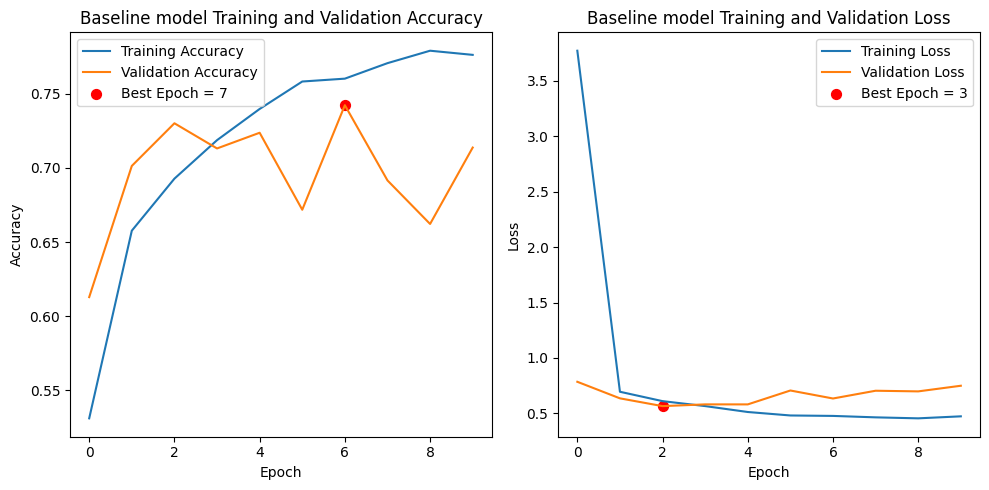

In [ ]:
plot_loss_accuracy(history, "Baseline model")

157/157 [==============================] - 1s 7ms/step


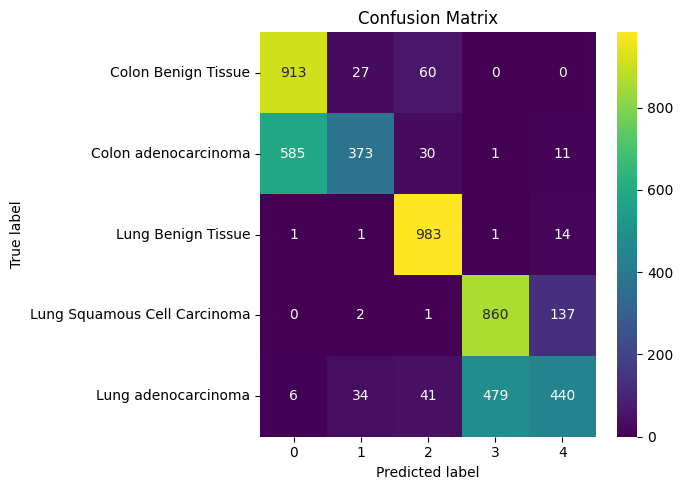

Classification Report:
                              precision    recall  f1-score   support

         Colon Benign Tissue       0.61      0.91      0.73      1000
        Colon adenocarcinoma       0.85      0.37      0.52      1000
          Lung Benign Tissue       0.88      0.98      0.93      1000
Lung Squamous Cell Carcinoma       0.64      0.86      0.73      1000
         Lung adenocarcinoma       0.73      0.44      0.55      1000

                    accuracy                           0.71      5000
                   macro avg       0.74      0.71      0.69      5000
                weighted avg       0.74      0.71      0.69      5000



In [ ]:
evaluate_model(model_a, X_val, y_val, 'Baseline Model')

157/157 [==============================] - 1s 7ms/step


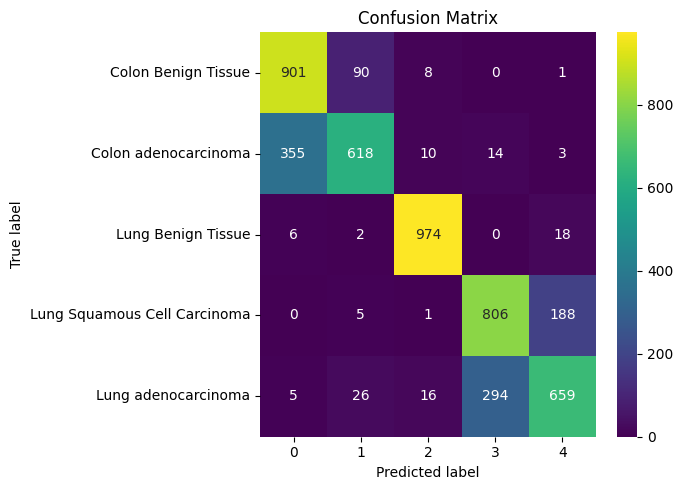

Classification Report:
                              precision    recall  f1-score   support

         Colon Benign Tissue       0.71      0.90      0.79      1000
        Colon adenocarcinoma       0.83      0.62      0.71      1000
          Lung Benign Tissue       0.97      0.97      0.97      1000
Lung Squamous Cell Carcinoma       0.72      0.81      0.76      1000
         Lung adenocarcinoma       0.76      0.66      0.71      1000

                    accuracy                           0.79      5000
                   macro avg       0.80      0.79      0.79      5000
                weighted avg       0.80      0.79      0.79      5000



In [15]:
evaluate_model(model_a, X_test, y_test, 'Baseline Model (test data)')

157/157 [==============================] - 1s 7ms/step


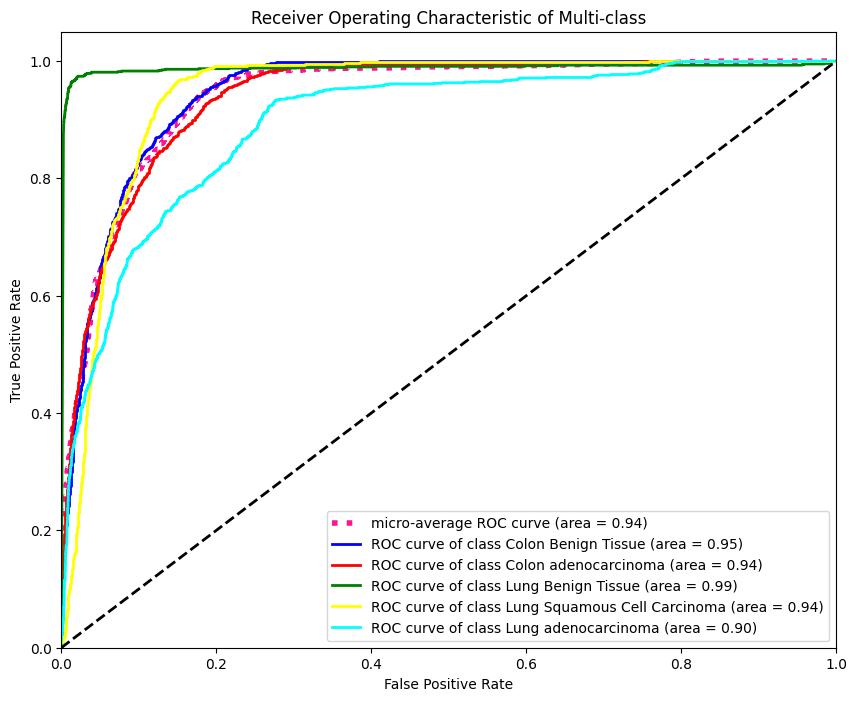

In [ ]:
plot_multiclass_roc(model_a, X_test, y_test, 5, class_names, "baseline_model")


# Enhanced Model

First iteration: adding more convolutional layers.

In [ ]:
#Building the first iteration based on the baseline model
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# creating a sequential model
model_a = Sequential()

# First convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same', input_shape = X_train.shape[1:]))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Second convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Third convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))

# Fourth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))

# Fifth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Adding fully connected layers (Dense layers)
model_a.add(layers.Flatten())

# Adding Dense leayers
model_a.add(layers.Flatten())
model_a.add(layers.Dense(128, activation='relu'))
model_a.add(layers.Dense(32, activation='relu'))
model_a.add(layers.Dense(5, activation='softmax'))

# Printing out the model summary
model_a.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 60, 60, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 30, 30, 128)       147584    
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 64)       

In [ ]:
#Compiling the model
model_a.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = model_a.fit(X_train,
                      y_train,
                      epochs=10,
                      batch_size=32,
                      validation_data = (X_val, y_val))
test_loss, test_acc = model_a.evaluate(X_test, y_test)

Epoch 1/10
469/469 [==============================] - 24s 48ms/step - loss: 1.3303 - accuracy: 0.6609 - val_loss: 0.3540 - val_accuracy: 0.8548
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.3275 - accuracy: 0.8639 - val_loss: 0.3528 - val_accuracy: 0.8470
Epoch 3/10
469/469 [==============================] - 21s 44ms/step - loss: 0.2112 - accuracy: 0.9175 - val_loss: 0.1700 - val_accuracy: 0.9306
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1775 - accuracy: 0.9320 - val_loss: 0.2139 - val_accuracy: 0.9266
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1147 - accuracy: 0.9555 - val_loss: 0.1503 - val_accuracy: 0.9490
Epoch 6/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0967 - accuracy: 0.9659 - val_loss: 0.1939 - val_accuracy: 0.9340
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0944 - accuracy: 0.9661 - val_loss: 0.1187 - val_accuracy:

Second iteration: altering the Max Pooling to overlapping pooling instead of regular pooling

In [ ]:
#Building the first iteration based on the baseline model
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# creating a sequential model
model_a = Sequential()

# First convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same', input_shape = X_train.shape[1:]))
model_a.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Second convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Third convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))

# Fourth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))

# Fifth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Adding fully connected layers (Dense layers)
model_a.add(layers.Flatten())

# Adding Dense leayers
model_a.add(layers.Flatten())
model_a.add(layers.Dense(128, activation='relu'))
model_a.add(layers.Dense(32, activation='relu'))
model_a.add(layers.Dense(5, activation='softmax'))

# Printing out the model summary
model_a.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 60, 60, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 30, 30, 128)       147584    
                                                                 
 conv2d_30 (Conv2D)          (None, 30, 30, 64)       

In [ ]:
#Compiling the model
model_a.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = model_a.fit(X_train,
                      y_train,
                      epochs=10,
                      batch_size=32,
                      validation_data = (X_val, y_val))
test_loss, test_acc = model_a.evaluate(X_test, y_test)

Epoch 1/10
469/469 [==============================] - 24s 47ms/step - loss: 1.1144 - accuracy: 0.6861 - val_loss: 0.4245 - val_accuracy: 0.8188
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.3520 - accuracy: 0.8521 - val_loss: 0.2855 - val_accuracy: 0.8878
Epoch 3/10
469/469 [==============================] - 22s 46ms/step - loss: 0.2506 - accuracy: 0.9025 - val_loss: 0.3273 - val_accuracy: 0.8788
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1879 - accuracy: 0.9283 - val_loss: 0.1665 - val_accuracy: 0.9366
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1764 - accuracy: 0.9357 - val_loss: 0.1981 - val_accuracy: 0.9230
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.1335 - accuracy: 0.9509 - val_loss: 0.1583 - val_accuracy: 0.9528
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1204 - accuracy: 0.9532 - val_loss: 0.1118 - val_accuracy:

Third iteration: increasing the number of epochs and including early stopping

In [ ]:
#Building the first iteration based on the baseline model
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# creating a sequential model
model_a = Sequential()

# First convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same', input_shape = X_train.shape[1:]))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Second convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Third convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))

# Fourth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))

# Fifth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Adding fully connected layers (Dense layers)
model_a.add(layers.Flatten())

# Adding Dense leayers
model_a.add(layers.Flatten())
model_a.add(layers.Dense(128, activation='relu'))
model_a.add(layers.Dense(32, activation='relu'))
model_a.add(layers.Dense(5, activation='softmax'))

# Printing out the model summary
model_a.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 60, 60, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 30, 30, 128)       147584    
                                                                 
 conv2d_35 (Conv2D)          (None, 30, 30, 64)       

In [ ]:
#Compiling the model
model_a.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               patience = 5,
                               restore_best_weights = True)

history = model_a.fit(X_train,
                      y_train,
                      epochs=100,
                      batch_size=32,
                      validation_data = (X_val, y_val),
                      callbacks=[early_stopping])
test_loss, test_acc = model_a.evaluate(X_test, y_test)

Epoch 1/100
469/469 [==============================] - 25s 45ms/step - loss: 1.4305 - accuracy: 0.5797 - val_loss: 0.6245 - val_accuracy: 0.7144
Epoch 2/100
469/469 [==============================] - 21s 45ms/step - loss: 0.4710 - accuracy: 0.7995 - val_loss: 0.4542 - val_accuracy: 0.7926
Epoch 3/100
469/469 [==============================] - 22s 46ms/step - loss: 0.3176 - accuracy: 0.8743 - val_loss: 0.2614 - val_accuracy: 0.8992
Epoch 4/100
469/469 [==============================] - 21s 44ms/step - loss: 0.2412 - accuracy: 0.9083 - val_loss: 0.2182 - val_accuracy: 0.9072
Epoch 5/100
469/469 [==============================] - 21s 45ms/step - loss: 0.1874 - accuracy: 0.9279 - val_loss: 0.2411 - val_accuracy: 0.9122
Epoch 6/100
469/469 [==============================] - 21s 46ms/step - loss: 0.1703 - accuracy: 0.9353 - val_loss: 0.1537 - val_accuracy: 0.9418
Epoch 7/100
469/469 [==============================] - 21s 45ms/step - loss: 0.1490 - accuracy: 0.9432 - val_loss: 0.1620 - val_ac

Foruth iteration: inclusion of dropout rate to fight overfitting

In [ ]:
#Building the first iteration based on the baseline model
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# creating a sequential model
model_a = Sequential()

# First convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same', input_shape = X_train.shape[1:]))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Second convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Third convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))

# Fourth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))

# Fifth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Adding fully connected layers (Dense layers)
model_a.add(layers.Flatten())

# First fully connected layer
model_a.add(layers.Dense(128, activation='relu'))
model_a.add(layers.Dropout(0.5))

# Second fully connected layer
model_a.add(layers.Dense(32, activation='relu'))
model_a.add(layers.Dropout(0.5))

# Third fully connected layer
model_a.add(layers.Dense(5, activation='softmax'))

# Printing out the model summary
model_a.summary()
# Printing out the model summary
model_a.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 60, 60, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 30, 30, 128)       147584    
                                                                 
 conv2d_40 (Conv2D)          (None, 30, 30, 64)       

In [ ]:
#Compiling the model
model_a.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               patience = 5,
                               restore_best_weights = True)

history = model_a.fit(X_train,
                      y_train,
                      epochs=100,
                      batch_size=32,
                      validation_data = (X_val, y_val),
                      callbacks=[early_stopping])
test_loss, test_acc = model_a.evaluate(X_test, y_test)

Epoch 1/100
469/469 [==============================] - 25s 46ms/step - loss: 1.6372 - accuracy: 0.3375 - val_loss: 0.9343 - val_accuracy: 0.5952
Epoch 2/100
469/469 [==============================] - 21s 44ms/step - loss: 0.9087 - accuracy: 0.5656 - val_loss: 0.5659 - val_accuracy: 0.7242
Epoch 3/100
469/469 [==============================] - 21s 46ms/step - loss: 0.7249 - accuracy: 0.6331 - val_loss: 0.5566 - val_accuracy: 0.7452
Epoch 4/100
469/469 [==============================] - 22s 46ms/step - loss: 0.5933 - accuracy: 0.7252 - val_loss: 0.4316 - val_accuracy: 0.8240
Epoch 5/100
469/469 [==============================] - 21s 46ms/step - loss: 0.4928 - accuracy: 0.7912 - val_loss: 0.3510 - val_accuracy: 0.8848
Epoch 6/100
469/469 [==============================] - 20s 44ms/step - loss: 0.4182 - accuracy: 0.8372 - val_loss: 0.3132 - val_accuracy: 0.8938
Epoch 7/100
469/469 [==============================] - 21s 45ms/step - loss: 0.3820 - accuracy: 0.8601 - val_loss: 0.2926 - val_ac

Fifth iteration: increasing the number of filters and the order in different convolutional layers.

In [ ]:
#Building the first iteration based on the baseline model
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# creating a sequential model
model_a = Sequential()

# First convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same', input_shape = X_train.shape[1:]))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Second convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Third convolutional layer
model_a.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'same'))

# Fourth convolutional layer
model_a.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'same'))

# Fifth convolutional layer
model_a.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Adding fully connected layers (Dense layers)
model_a.add(layers.Flatten())

# First fully connected layer
model_a.add(layers.Dense(128, activation='relu'))
model_a.add(layers.Dropout(0.5))

# Second fully connected layer
model_a.add(layers.Dense(32, activation='relu'))
model_a.add(layers.Dropout(0.5))

# Third fully connected layer
model_a.add(layers.Dense(5, activation='softmax'))

# Printing out the model summary
model_a.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 60, 60, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 30, 30, 256)       295168    
                                                                 
 conv2d_55 (Conv2D)          (None, 30, 30, 256)     

In [ ]:
#Compiling the model
model_a.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               patience = 5,
                               restore_best_weights = True)

history = model_a.fit(X_train,
                      y_train,
                      epochs=100,
                      batch_size=32,
                      validation_data = (X_val, y_val),
                      callbacks=[early_stopping])
test_loss, test_acc = model_a.evaluate(X_test, y_test)

Epoch 1/100
469/469 [==============================] - 35s 69ms/step - loss: 2.1882 - accuracy: 0.3364 - val_loss: 0.8552 - val_accuracy: 0.5762
Epoch 2/100
469/469 [==============================] - 32s 68ms/step - loss: 1.1271 - accuracy: 0.4738 - val_loss: 0.7180 - val_accuracy: 0.6576
Epoch 3/100
469/469 [==============================] - 32s 68ms/step - loss: 0.7574 - accuracy: 0.6427 - val_loss: 0.5225 - val_accuracy: 0.7714
Epoch 4/100
469/469 [==============================] - 32s 68ms/step - loss: 0.6978 - accuracy: 0.6895 - val_loss: 0.5367 - val_accuracy: 0.7626
Epoch 5/100
469/469 [==============================] - 34s 73ms/step - loss: 0.6222 - accuracy: 0.7145 - val_loss: 0.6046 - val_accuracy: 0.6540
Epoch 6/100
469/469 [==============================] - 34s 73ms/step - loss: 0.5657 - accuracy: 0.7477 - val_loss: 0.4719 - val_accuracy: 0.8098
Epoch 7/100
469/469 [==============================] - 34s 73ms/step - loss: 0.5005 - accuracy: 0.7802 - val_loss: 0.4580 - val_ac

Sixth iteration: increasing the filter sizes of lower convolutional layers and increasing the filter size for later ones.

In [ ]:
#Building the first iteration based on the baseline model
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# creating a sequential model
model_b = Sequential()

# First convolutional layer
model_b.add(layers.Conv2D(128, (7,7), activation='relu', padding = 'same', input_shape = X_train.shape[1:]))
model_b.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Second convolutional layer
model_b.add(layers.Conv2D(128, (5,5), activation='relu', padding = 'same'))
model_b.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Third convolutional layer
model_b.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'same'))

# Fourth convolutional layer
model_b.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'same'))

# Fifth convolutional layer
model_b.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'same'))
model_b.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Sixth convolutional layer
model_b.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'same'))
model_b.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Adding fully connected layers (Dense layers)
model_b.add(layers.Flatten())

# First fully connected layer
model_b.add(layers.Dense(128, activation='relu'))
model_b.add(layers.Dropout(0.5))

# Second fully connected layer
model_b.add(layers.Dense(32, activation='relu'))
model_b.add(layers.Dropout(0.5))

# Third fully connected layer
model_b.add(layers.Dense(5, activation='softmax'))

# Printing out the model summary
model_b.summary()
# Printing out the model summary
model_b.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 120, 120, 128)     18944     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 60, 60, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 60, 60, 128)       409728    
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_65 (Conv2D)          (None, 30, 30, 256)       295168    
                                                                 
 conv2d_66 (Conv2D)          (None, 30, 30, 256)     

In [ ]:
#Compiling the model
model_b.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               patience = 5,
                               restore_best_weights = True)

history = model_b.fit(X_train,
                      y_train,
                      epochs=100,
                      batch_size=32,
                      validation_data = (X_val, y_val),
                      callbacks=[early_stopping])
test_loss, test_acc = model_b.evaluate(X_test, y_test)

Epoch 1/100
469/469 [==============================] - 45s 89ms/step - loss: 1.5427 - accuracy: 0.3625 - val_loss: 1.0630 - val_accuracy: 0.5108
Epoch 2/100
469/469 [==============================] - 42s 90ms/step - loss: 0.9024 - accuracy: 0.5998 - val_loss: 0.9605 - val_accuracy: 0.6116
Epoch 3/100
469/469 [==============================] - 41s 87ms/step - loss: 0.6799 - accuracy: 0.6812 - val_loss: 0.5586 - val_accuracy: 0.7380
Epoch 4/100
469/469 [==============================] - 42s 90ms/step - loss: 0.6055 - accuracy: 0.7169 - val_loss: 0.5628 - val_accuracy: 0.7584
Epoch 5/100
469/469 [==============================] - 42s 90ms/step - loss: 0.5674 - accuracy: 0.7453 - val_loss: 0.5678 - val_accuracy: 0.7026
Epoch 6/100
469/469 [==============================] - 42s 90ms/step - loss: 0.5155 - accuracy: 0.7715 - val_loss: 0.4403 - val_accuracy: 0.8202
Epoch 7/100
469/469 [==============================] - 42s 90ms/step - loss: 0.5114 - accuracy: 0.7767 - val_loss: 0.3937 - val_ac

Final, enhanced model

In [ ]:
# Enhanced model
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# creating a sequential model
model_a = Sequential()

# First convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same', input_shape = X_train.shape[1:]))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Second convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Third convolutional layer
model_a.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))

# Fourth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))

# Fifth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Sixth convolutional layer
model_a.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model_a.add(layers.MaxPooling2D((2, 2), padding = 'same'))

# Adding fully connected layers (Dense layers)
model_a.add(layers.Flatten())

# First fully connected layer
model_a.add(layers.Dense(128, activation='relu'))
model_a.add(layers.Dropout(0.5))

# Second fully connected layer
model_a.add(layers.Dense(32, activation='relu'))
model_a.add(layers.Dropout(0.5))

# Third fully connected layer
model_a.add(layers.Dense(5, activation='softmax'))

# Printing out the model summary
model_a.summary()

#Compiling the model
model_a.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               patience = 5,
                               restore_best_weights = True)

history = model_a.fit(X_train,
                      y_train,
                      epochs=100,
                      batch_size=32,
                      validation_data = (X_val, y_val),
                      callbacks=[early_stopping])
test_loss, test_acc = model_a.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        7

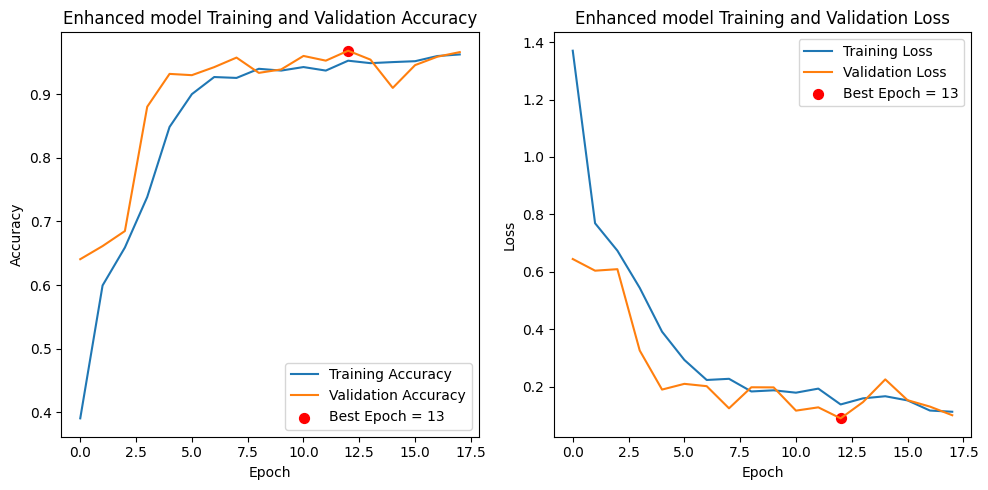

In [ ]:
plot_loss_accuracy(history, "Enhanced model")

157/157 [==============================] - 2s 11ms/step


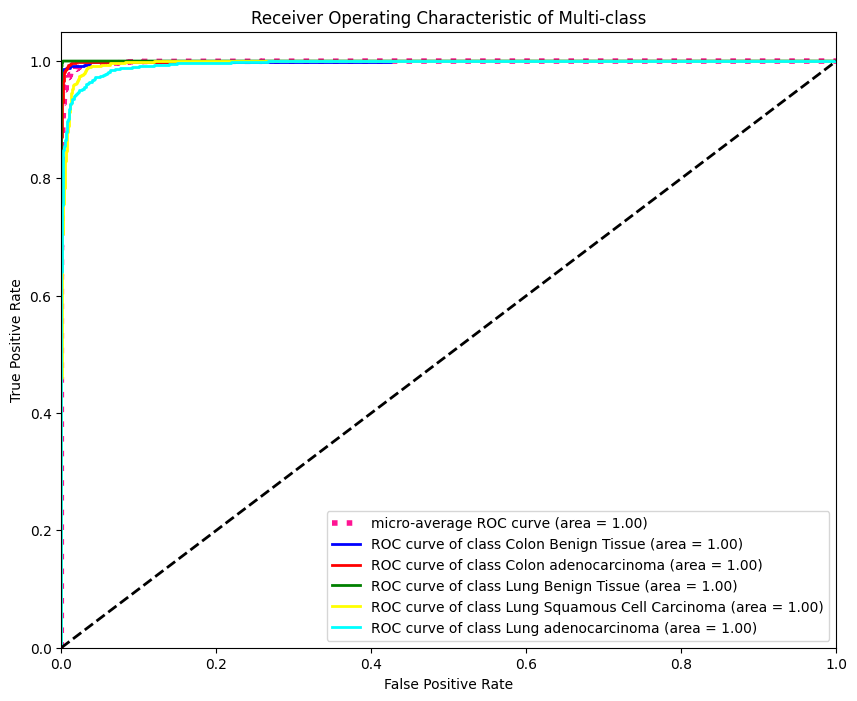

In [ ]:
plot_multiclass_roc(model_a, X_test, y_test, 5, class_names, "Enhanced model")

157/157 [==============================] - 2s 11ms/step


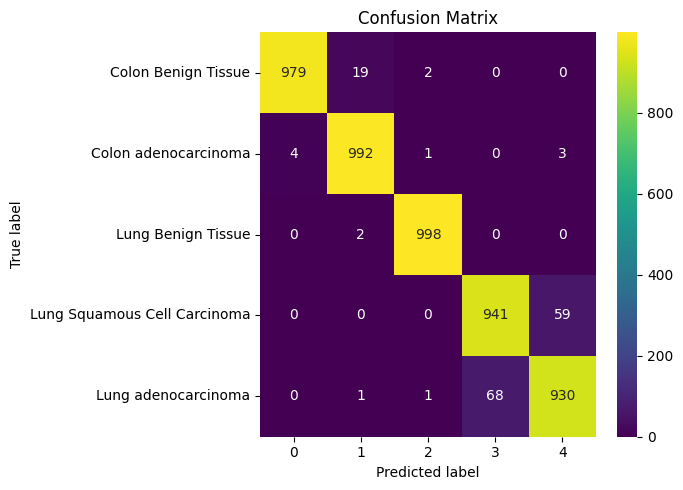

Classification Report:
                              precision    recall  f1-score   support

         Colon Benign Tissue       1.00      0.98      0.99      1000
        Colon adenocarcinoma       0.98      0.99      0.99      1000
          Lung Benign Tissue       1.00      1.00      1.00      1000
Lung Squamous Cell Carcinoma       0.93      0.94      0.94      1000
         Lung adenocarcinoma       0.94      0.93      0.93      1000

                    accuracy                           0.97      5000
                   macro avg       0.97      0.97      0.97      5000
                weighted avg       0.97      0.97      0.97      5000



In [ ]:
evaluate_model(model_a, X_val, y_val, 'Enhanced Model')

# Transfer Learning Model


In [ ]:
from tensorflow.keras.applications import ResNet50

# Loading ResNet50 model
ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

# Freezing the layers
for layer in ResNet50_model.layers:
    layer.trainable = False


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers, models

# Create the model
model_b = models.Sequential()

# Add the base model
model_b.add(ResNet50_model)

# Add new layers
model_b.add(layers.Flatten())
model_b.add(layers.Dense(128, activation='relu'))
model_b.add(layers.Dense(32, activation='relu'))
model_b.add(layers.Dense(5, activation='softmax'))

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4194432   
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 27786437 (106.00 MB)
Trainable params: 4198725 (16.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model_b.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = model_b.fit(X_train,
                      y_train,
                      epochs=10,
                      batch_size=32,
                      validation_data = (X_val, y_val))
test_loss, test_acc = model_b.evaluate(X_test, y_test)



Epoch 1/10
469/469 [==============================] - 41s 73ms/step - loss: 0.2269 - accuracy: 0.9373 - val_loss: 0.0750 - val_accuracy: 0.9736
Epoch 2/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0480 - accuracy: 0.9825 - val_loss: 0.0880 - val_accuracy: 0.9716
Epoch 3/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0300 - accuracy: 0.9889 - val_loss: 0.1244 - val_accuracy: 0.9632
Epoch 4/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0676 - val_accuracy: 0.9796
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.1862 - val_accuracy: 0.9654
Epoch 6/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0659 - val_accuracy: 0.9848
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0307 - accuracy: 0.9897 - val_loss: 0.0872 - val_accuracy:

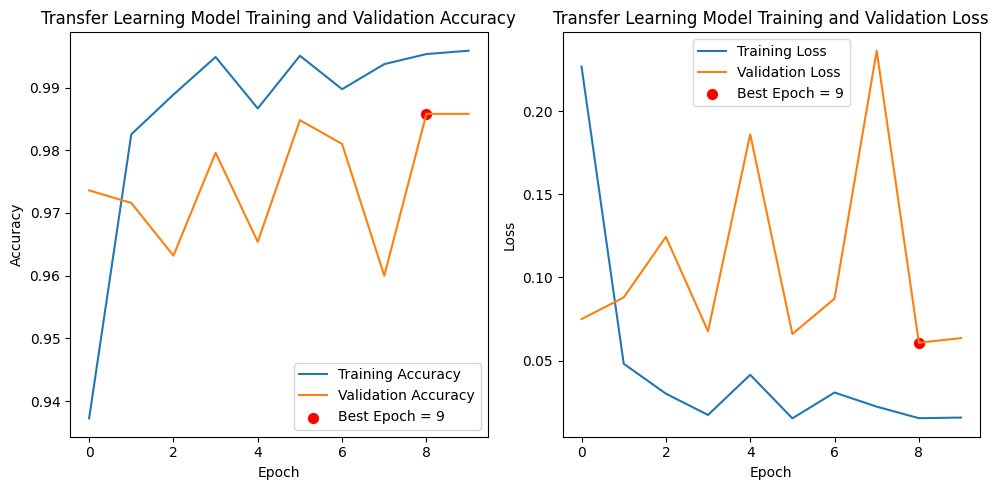

In [ ]:
plot_loss_accuracy(history, "Transfer Learning Model")

157/157 [==============================] - 7s 31ms/step


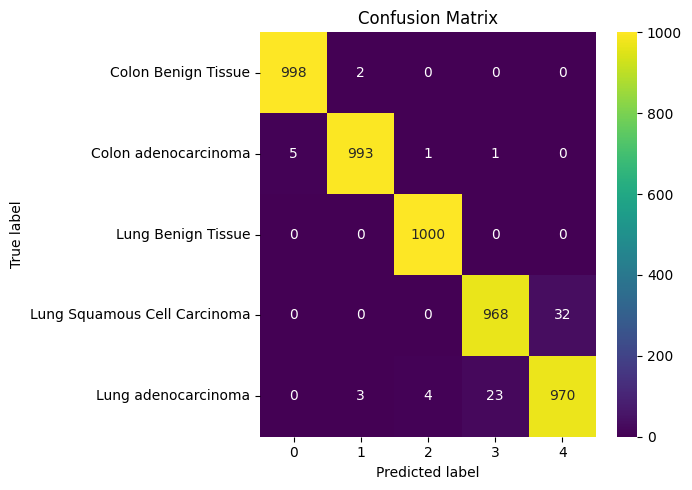

Classification Report:
                              precision    recall  f1-score   support

         Colon Benign Tissue       1.00      1.00      1.00      1000
        Colon adenocarcinoma       0.99      0.99      0.99      1000
          Lung Benign Tissue       1.00      1.00      1.00      1000
Lung Squamous Cell Carcinoma       0.98      0.97      0.97      1000
         Lung adenocarcinoma       0.97      0.97      0.97      1000

                    accuracy                           0.99      5000
                   macro avg       0.99      0.99      0.99      5000
                weighted avg       0.99      0.99      0.99      5000



In [ ]:
evaluate_model(model_b, X_val, y_val, 'Transfer Learning Model')

157/157 [==============================] - 5s 31ms/step


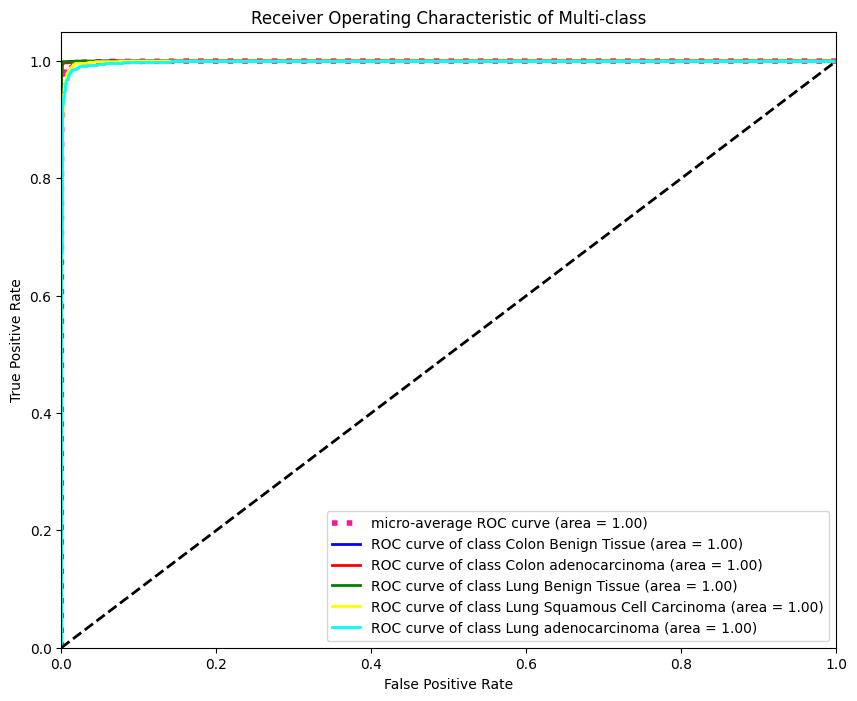

In [ ]:
plot_multiclass_roc(model_b, X_test, y_test, 5, class_names, "transfer_learning_model")